In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from rmgpy.chemkin import readThermoEntry

In [32]:
# NASA polynomials

data = [
    """S(1012)                 H   8C  12          G   100.000  5000.000  971.45      1
 1.43653545E+01 4.12008398E-02-1.51721942E-05 2.96408337E-09-2.25161643E-13    2
 3.57370485E+04-4.41464072E+01 2.27611298E+00 3.89925988E-03 1.76882473E-04    3
-2.21107928E-07 8.11852051E-11 4.21948028E+04 3.49754556E+01                   4
    """,
    """tribenzene              H   8C  12          G    10.000  3000.000  587.19      1
-4.92439707E+00 1.00484282E-01-7.04671498E-05 2.30430626E-08-2.83377131E-12    2
 8.70661929E+04 4.41997343E+01 3.85395354E+00 8.23482207E-03 2.48084983E-04    3
-4.32744423E-07 2.31293222E-10 8.65947038E+04 1.12865202E+01                   4
    """
]

labels = [
    'RMG GAV',
    'CBS-QB3',
]

In [7]:
thermo = []
for entry in data:
    thermo.append(readThermoEntry(entry)[1])

In [25]:
tlist = np.linspace(300, 3000, 100)
Cpall = []
Hall = []
Sall = []
Gall = []
for entry in thermo:
    Cplist = np.zeros_like(tlist)
    Hlist = np.zeros_like(tlist)
    Slist = np.zeros_like(tlist)
    Glist = np.zeros_like(tlist)
    for i, t in enumerate(tlist):
        Cplist[i] = entry.getHeatCapacity(t) / 4.184
        Hlist[i] = entry.getEnthalpy(t) / 4184
        Slist[i] = entry.getEntropy(t) / 4.184
        Glist[i] = entry.getFreeEnergy(t) / 4184
    Cpall.append(Cplist)
    Hall.append(Hlist)
    Sall.append(Slist)
    Gall.append(Glist)

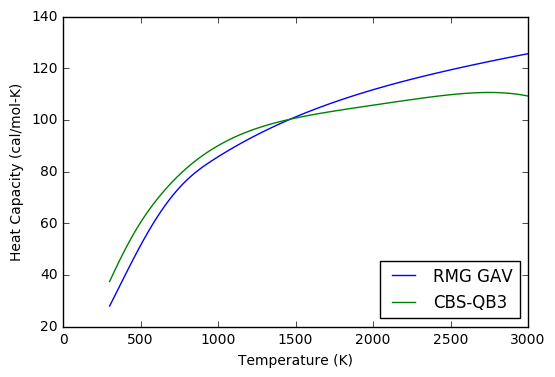

In [35]:
for item, label in zip(Cpall, labels):
    plt.plot(tlist, item, label=label)
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (cal/mol-K)')
plt.legend(loc=4)
plt.show()

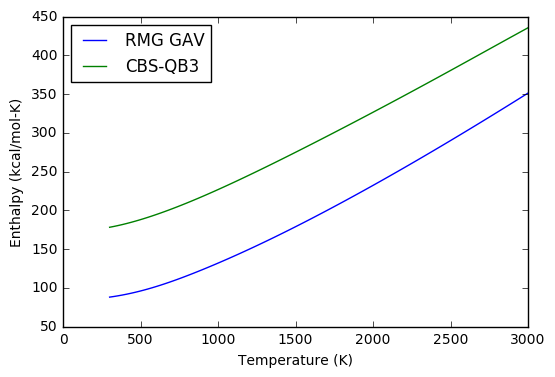

In [38]:
for item, label in zip(Hall, labels):
    plt.plot(tlist, item, label=label)
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kcal/mol-K)')
plt.legend(loc=2)
plt.show()

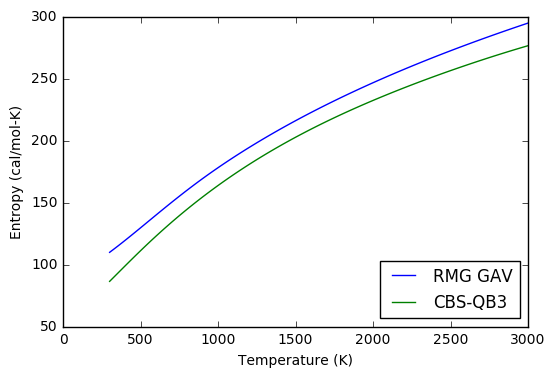

In [39]:
for item, label in zip(Sall, labels):
    plt.plot(tlist, item, label=label)
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (cal/mol-K)')
plt.legend(loc=4)
plt.show()

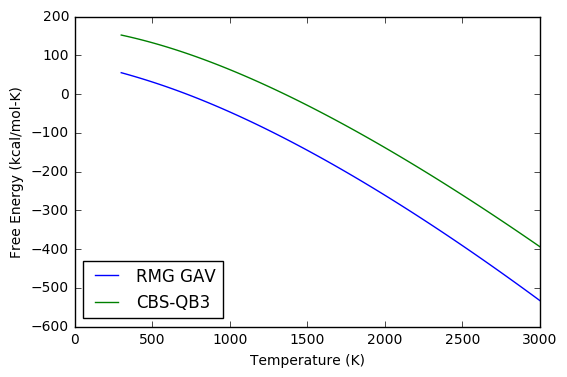

In [40]:
for item, label in zip(Gall, labels):
    plt.plot(tlist, item, label=label)
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy (kcal/mol-K)')
plt.legend(loc=3)
plt.show()